# Empleo agrícola (% del total)
Código del indicador WB: SL.AGR.EMPL.ZS

## Enfoque de análisis:
El empleo agrícola es un pilar fundamental para la seguridad alimentaria y la economía rural en Sudamérica. Este indicador refleja no solo la dependencia económica del sector primario, sino también su rol crítico en la producción de alimentos para consumo local y subsistencia familiar. Una alta proporción de empleo agrícola suele asociarse a economías rurales con limitada diversificación productiva, donde la agricultura de pequeña escala actúa como red de seguridad contra la pobreza, pero también expone a las poblaciones a vulnerabilidades como la volatilidad de precios, eventos climáticos extremos y acceso desigual a mercados.

En el contexto sudamericano, este porcentaje revela tensiones entre modernización y tradición: mientras una reducción podría indicar procesos de urbanización y diversificación económica, también podría debilitar sistemas alimentarios locales. Por otro lado, su persistencia evidencia la capacidad del agro para sostener comunidades rurales, aunque frecuentemente vinculado a informalidad laboral, baja tecnificación y desafíos en competitividad.

## CODIGO PARA OBTENER LOS DATOS

In [2]:
import requests
import pandas as pd

# Configuración inicial
INDICADOR = "SL.AGR.EMPL.ZS"
PAISES_SUDAMERICANOS = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia",
    "Ecuador", "Paraguay", "Peru", "Uruguay", "Venezuela, RB"
]
ANIO_INICIO = 2018
ANIO_FIN = 2023

# 1. Extracción de datos
def obtener_datos_banco_mundial():
    url = f"https://api.worldbank.org/v2/country/all/indicator/{INDICADOR}?format=json&per_page=20000"
    try:
        response = requests.get(url, timeout=30)
        response.raise_for_status()
        datos = response.json()
        return datos[1] if len(datos) > 1 else None
    except requests.exceptions.RequestException as e:
        print(f"Error en la conexión: {e}")
        return None
    except (IndexError, ValueError) as e:
        print(f"Error procesando datos: {e}")
        return None

# 2. Procesamiento y filtrado
def procesar_datos(registros):
    if not registros:
        return pd.DataFrame()

    datos_filtrados = []
    for registro in registros:
        pais = registro['country']['value']
        if pais in PAISES_SUDAMERICANOS and registro['value'] is not None:
            anio = int(registro['date'])
            if ANIO_INICIO <= anio <= ANIO_FIN:
                datos_filtrados.append({
                    'País': pais,
                    'Código País': registro['countryiso3code'],
                    'Año': anio,
                    'Empleo Agrícola (% total)': registro['value']
                })

    return pd.DataFrame(datos_filtrados)

# 3. Ejecución principal
if __name__ == "__main__":
    # Extraer datos
    registros = obtener_datos_banco_mundial()

    if registros is None:
        print("No se pudieron obtener datos de la API")
    else:
        # Procesar datos
        df_sudamerica = procesar_datos(registros)

        if not df_sudamerica.empty:
            # Ordenar y mostrar
            df_sudamerica = df_sudamerica.sort_values(by=['País', 'Año'])
            print("\nDatos de empleo agrícola en Sudamérica (2018-2023):")
            print(df_sudamerica.to_string(index=False))


Datos de empleo agrícola en Sudamérica (2018-2023):
         País Código País  Año  Empleo Agrícola (% total)
    Argentina         ARG 2018                   0.624305
    Argentina         ARG 2019                   0.609655
    Argentina         ARG 2020                   0.605510
    Argentina         ARG 2021                   0.570907
    Argentina         ARG 2022                   0.646133
    Argentina         ARG 2023                   0.612884
      Bolivia         BOL 2018                  31.070025
      Bolivia         BOL 2019                  27.414421
      Bolivia         BOL 2020                  30.000651
      Bolivia         BOL 2021                  27.647413
      Bolivia         BOL 2022                  24.808135
      Bolivia         BOL 2023                  24.350619
       Brazil         BRA 2018                   9.056942
       Brazil         BRA 2019                   8.877276
       Brazil         BRA 2020                   9.314073
       Brazil      

## BASE DE DATOS


In [3]:
# Exportar a CSV
df_sudamerica.to_csv('empleo_agricola_sudamerica.csv', index=False)
print("\nDatos exportados a 'empleo_agricola_sudamerica.csv'")


Datos exportados a 'empleo_agricola_sudamerica.csv'


## Análisis descriptivo

### Cargar librerias

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
# Leer el archivo CSV
df = pd.read_csv('empleo_agricola_sudamerica.csv')

# 1. Análisis descriptivo
descripcion = df.groupby('País')['Empleo Agrícola (% total)'].describe()
print("Estadísticas descriptivas por país:")
print(descripcion)


Estadísticas descriptivas por país:
               count       mean       std        min        25%        50%  \
País                                                                         
Argentina        6.0   0.611566  0.024708   0.570907   0.606546   0.611270   
Bolivia          6.0  27.548544  2.689906  24.350619  25.459706  27.530917   
Brazil           6.0   8.946360  0.458897   8.202819   8.767899   8.967109   
Chile            6.0   7.003291  0.759213   6.208364   6.382586   6.866182   
Colombia         6.0  15.802003  1.041338  14.438886  14.985777  16.019523   
Ecuador          6.0  30.696231  1.365465  28.824710  29.805909  30.762006   
Paraguay         6.0  19.062051  1.597497  17.171408  17.740252  19.218291   
Peru             6.0  27.140804  3.426381  23.966831  25.593543  25.897785   
Uruguay          6.0   8.454880  0.279651   8.011360   8.315126   8.513079   
Venezuela, RB    6.0  10.637370  0.678024   9.321195  10.653322  10.800384   

                     75%   

### Calcular cambio porcentual 2018-2023

In [7]:
# Calcular cambio porcentual 2018-2023
df_2018 = df[df['Año'] == 2018][['País', 'Empleo Agrícola (% total)']].rename(
    columns={'Empleo Agrícola (% total)': '2018'})
df_2023 = df[df['Año'] == 2023][['País', 'Empleo Agrícola (% total)']].rename(
    columns={'Empleo Agrícola (% total)': '2023'})
cambio = pd.merge(df_2018, df_2023, on='País', how='inner')
cambio['Cambio %'] = ((cambio['2023'] - cambio['2018']) / cambio['2018']) * 100

print("\nCambio porcentual 2018-2023:")
print(cambio[['País', '2018', '2023', 'Cambio %']].sort_values('Cambio %', ascending=False))



Cambio porcentual 2018-2023:
            País       2018       2023   Cambio %
9  Venezuela, RB   9.321195  10.631022  14.052136
8        Uruguay   8.358714   8.705609   4.150100
5        Ecuador  28.824710  29.997817   4.069794
0      Argentina   0.624305   0.612884  -1.829388
7           Peru  26.126785  23.966831  -8.267202
2         Brazil   9.056942   8.202819  -9.430598
6       Paraguay  20.076887  17.171408 -14.471758
4       Colombia  16.999371  14.438886 -15.062238
1        Bolivia  31.070025  24.350619 -21.626650
3          Chile   7.999597   6.208364 -22.391536


### Visualizaciones

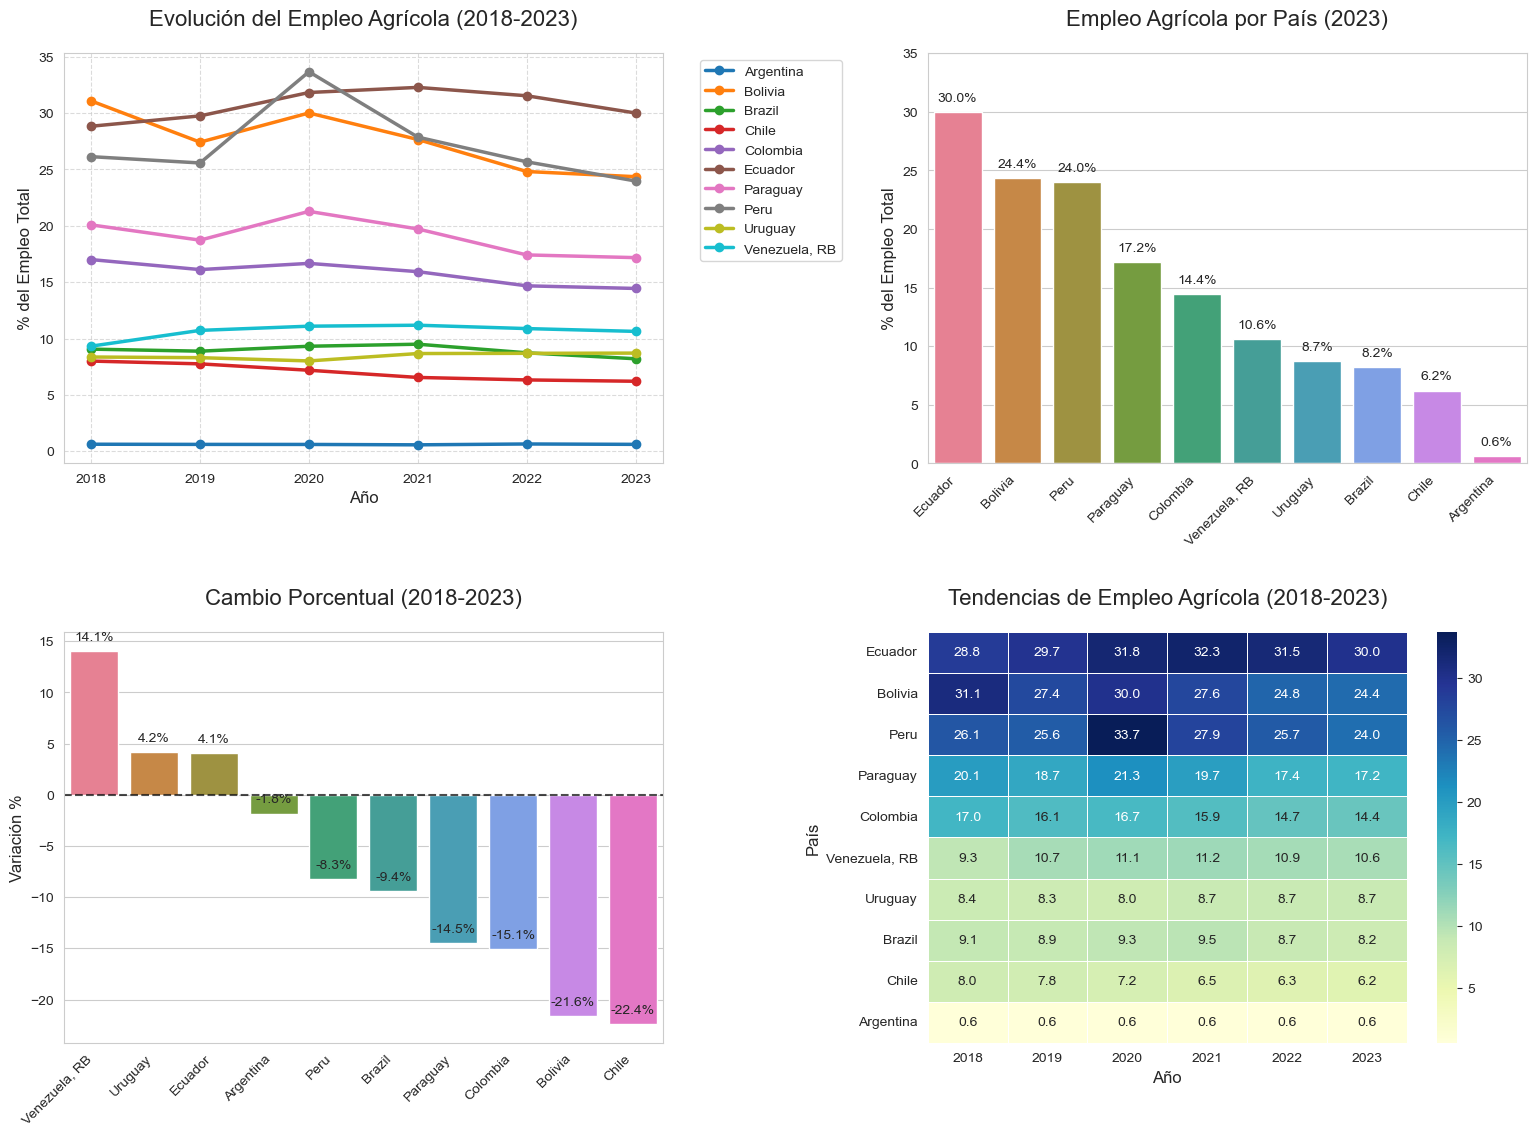

In [8]:
# 2. Visualizaciones mejoradas
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(df['País'].unique()))

# Evolución temporal
plt.subplot(2, 2, 1)
for pais in df['País'].unique():
    datos_pais = df[df['País'] == pais]
    plt.plot(datos_pais['Año'], datos_pais['Empleo Agrícola (% total)'],
             label=pais, marker='o', linewidth=2.5)

plt.title('Evolución del Empleo Agrícola (2018-2023)', fontsize=16, pad=20)
plt.ylabel('% del Empleo Total', fontsize=12)
plt.xlabel('Año', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(range(2018, 2024))
plt.grid(True, linestyle='--', alpha=0.7)

# Comparación 2023 con anotaciones
plt.subplot(2, 2, 2)
df_2023 = df[df['Año'] == 2023].sort_values('Empleo Agrícola (% total)', ascending=False)
ax = sns.barplot(data=df_2023, x='País', y='Empleo Agrícola (% total)',
                 hue='País', palette=palette, dodge=False, legend=False)

# Añadir etiquetas de valor
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Empleo Agrícola por País (2023)', fontsize=16, pad=20)
plt.ylabel('% del Empleo Total', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 35)

# Cambio porcentual con etiquetas
plt.subplot(2, 2, 3)
cambio = cambio.sort_values('Cambio %', ascending=False)
ax = sns.barplot(data=cambio, x='País', y='Cambio %',
                 hue='País', palette=palette, dodge=False, legend=False)

# Añadir etiquetas de valor
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Cambio Porcentual (2018-2023)', fontsize=16, pad=20)
plt.ylabel('Variación %', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linestyle='--', alpha=0.7)

# Mapa de calor de tendencias
plt.subplot(2, 2, 4)
pivot_df = df.pivot(index='País', columns='Año', values='Empleo Agrícola (% total)')
pivot_df = pivot_df.sort_values(2023, ascending=False)
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title('Tendencias de Empleo Agrícola (2018-2023)', fontsize=16, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('País', fontsize=12)

plt.tight_layout(pad=3.0)
plt.savefig('analisis_completo_empleo_agricola.png', dpi=300, bbox_inches='tight')
plt.show()

### Análisis de grupos

In [10]:
# 3. Análisis de grupos manual (sin clustering)
# Crear grupos basados en empleo agrícola 2023
condiciones = [
    df_2023['Empleo Agrícola (% total)'] > 20,
    (df_2023['Empleo Agrícola (% total)'] >= 10) & (df_2023['Empleo Agrícola (% total)'] <= 20),
    df_2023['Empleo Agrícola (% total)'] < 10
]

categorias = ['Alta dependencia', 'Media dependencia', 'Baja dependencia']
df_2023['Grupo Dependencia'] = np.select(condiciones, categorias, default='Otros')

# Unir con datos de cambio
df_grupos = pd.merge(df_2023, cambio[['País', 'Cambio %']], on='País')

# 4. Hallazgos clave
print("\n" + "="*80)
print("HALLAZGOS CLAVE DEL EMPLEO AGRÍCOLA EN SUDAMÉRICA (2018-2023)")
print("="*80)

# Análisis por grupos de dependencia
for grupo in df_grupos['Grupo Dependencia'].unique():
    grupo_df = df_grupos[df_grupos['Grupo Dependencia'] == grupo]
    print(f"\nGrupo: {grupo}")
    print(f"Países: {', '.join(grupo_df['País'].tolist())}")
    print(f"Empleo agrícola promedio (2023): {grupo_df['Empleo Agrícola (% total)'].mean():.1f}%")
    print(f"Cambio promedio (2018-2023): {grupo_df['Cambio %'].mean():.1f}%")


HALLAZGOS CLAVE DEL EMPLEO AGRÍCOLA EN SUDAMÉRICA (2018-2023)

Grupo: Alta dependencia
Países: Ecuador, Bolivia, Peru
Empleo agrícola promedio (2023): 26.1%
Cambio promedio (2018-2023): -8.6%

Grupo: Media dependencia
Países: Paraguay, Colombia, Venezuela, RB
Empleo agrícola promedio (2023): 14.1%
Cambio promedio (2018-2023): -5.2%

Grupo: Baja dependencia
Países: Uruguay, Brazil, Chile, Argentina
Empleo agrícola promedio (2023): 5.9%
Cambio promedio (2018-2023): -7.4%


###  OBSERVACIONES

1. **Persistencia de la alta dependencia agrícola en países andinos**:

   * **Ecuador, Bolivia y Perú** mantienen los niveles más altos de empleo agrícola en 2023, con un promedio del **26.1%**.
   * Sin embargo, incluso dentro de este grupo, **Bolivia** muestra una fuerte caída del **-21.6%**, mientras que **Ecuador** registra un leve aumento de **+4.1%**, lo que lo convierte en una excepción en la región.

2. **Grupo de media dependencia con tendencias mixtas**:

   * Este grupo (Paraguay, Colombia, Venezuela) tiene un promedio del **14.1%** en 2023.
   * **Venezuela** destaca por ser el **único país con un incremento relevante** en el empleo agrícola (**+14.05%**), lo cual puede reflejar un retroceso estructural o una crisis en otros sectores productivos.
   * En cambio, **Colombia y Paraguay** muestran caídas significativas de más del **-14%**.

3. **Baja dependencia no significa estancamiento**:

   * Países como **Chile, Brasil y Argentina** tienen niveles bajos de empleo agrícola (promedio de **5.9%** en 2023), reflejando economías más industrializadas o terciarizadas.
   * No obstante, estos países también presentan descensos notables, con **Chile** liderando la caída con un **-22.39%**.

4. **Caída generalizada**:

   * El empleo agrícola ha disminuido en **8 de los 10 países analizados**.
   * Solo **Venezuela y Ecuador** registran aumentos, lo que podría responder a condiciones específicas locales o retrocesos económicos.

---

### 📌 CONCLUSIONES

1. **Tendencia regional hacia la reducción del empleo agrícola**:
   La mayoría de países sudamericanos están **reduciendo su dependencia laboral del sector agrícola**, lo que sugiere una transición hacia economías más diversificadas, pero también podría reflejar un **abandono del agro sin planes de sustitución productiva claros**.

2. **Persisten grandes brechas estructurales**:

   * Hay una marcada diferencia entre países como **Argentina (0.61%)** y **Bolivia (24.35%)**, lo que revela **desigualdades en el desarrollo sectorial** y en la modernización del campo.

3. **Casos excepcionales que requieren análisis**:

   * El crecimiento del empleo agrícola en **Venezuela** podría no ser un signo de fortalecimiento del agro, sino una **respuesta a crisis económicas** que empujan a las personas a actividades de subsistencia.
   * **Ecuador**, en cambio, podría estar reforzando su sector agrícola formal o expandiendo su agroindustria, lo cual merecería un estudio más detallado.
